# Big-Data Systems and Intelligence Analytics

# Assignment # 1

# King County House Price Prediction

## Abstract

This paper is about the analysis of King County dataset and build a model to predict house sale prices which includes Seattle.

It includes homes sold between May 2014 and May 2015. The dataset comes from Kaggle competition supported by House Sales in King

County. I have used various classification as well as regression methods and try to predict the house prices. Experiments are

conducted to evaluate various aspects of the proposed model and encouraging are obtained in all the experiment. I deployed a

number of methodologies like Bagging and boosting algorithm, logistic regression, linear regression. By comparing all the

regressor models it was found that XGBoost GridSearch method performed well with accuracy 87.36%. On the other hand while

comparing all the classification models it was found that XGBoost GridSearch method performed well with accuracy 91.20%.
##### Keywords: Random Forest Classifier, XGBoost Classifier, Logistic Regression, Random Forest Regressor, XGBoost Regressor, Linear       Regression, AdaBoost Classifier, AdaBoost Regressor

### Importing Libraries and Datasets

Algorithms used.

##### For Part A:

    A.1 : Bagging Algo : Random Forest Classifier
    
        A.1.1 : Base Model
        A.1.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
            
    A.2 : Boosting Algo : XGBoost Classifier
    
        A.2.1 : Base Model
        A.2.2 : Hyper Parameter Tuning
                GridSearchCV
            
##### For Part B:

    B.1 : Logistic Regression
    
##### For Part C:

    C.1 : Bagging Algo : Random Forest Regressor
    
        C.1.1 : Base Model
        C.1.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
                
    C.2 : Boosting Algo : XGBoost Regressor
    
        C.2.1 : Base Model
        C.2.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
    
##### For Part D:

    D.1 : Linear Regression 
    
    D.2 : Regression Regularization (like Ridge Regression)
        
        D.2.1 : Base Model
        D.2.2 : Alpha parameter Tuning
                RandomizedCV
                GridSearchCV
        
##### For Part E:

    E.1 : Ada Boosting Classifier
    
        E.1.1 : Base Model
        E.1.2 : Hyper parameter Tuning
                GridSearchCV
              
    E.2 : Ada Boosting Regressor
    
        E.2.1 : Base Model
        E.2.2 : Hyper parameter Tuning
                RandomizedCV
              
              
              
##### Model Evalution and Comparision : 

    I.Classification Model
        : accuracy_score
        : Classification_report
            precision  ,  recall  , f1-score  , support
        : Confusion_Matrix
        : Print_Metrics
            logloss , accuracy, precision, F1 , r2 , AUC
        : Check_stats
            loss , avg loss
        : ROC Curve
    
    II.Regression Model
        : Average Error
        : Accuracy
        : Root Mean Squared Error
        : Cross Validation Score
        : Regression Plot
        : QQ Plot
        : Residual plot

In [184]:
# General Essential Libraries for data analysis and vizualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from math import sqrt
from tabulate import tabulate
from pprint import pprint
from scipy.stats import norm
from scipy import stats

##sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics


##sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,KFold

##sklearn.linear_model
from sklearn.linear_model import LinearRegression ,RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

##xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor

##sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

##statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

Below I define a method for score and parameter value. From this function I can estimate a reasonable range for each parameter to try in GridSearchCV. This method will cut down on the time calculating optimum parameters.

In [11]:
def evaluate_param(model,parameter, num_range, index, X_train , y_train):
    grid_search = GridSearchCV(model, param_grid = {parameter: num_range})
    grid_search.fit(X_train, y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

Below method defines the classification model evaluation by providing the following scores.

In [12]:
def Print_Metrics(best_model,y_test,X_test,y_predict_test):
    print('\nModel performance on the test data set:')

    # print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    # print('Validate Accuracy....', accuracy_score(y_valid, best_model.predict(X_valid)))

    # y_predict_test  = best_model.predict(X_test)
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    #accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
    #test_auc       = h2o.get_model("best_rf").model_performance(test_data=test).auc()
    #print('Best model performance based on auc: ', test_auc)
    
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    
    result = {
        "logloss" : logloss_test,
        "accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }
    

    print(tabulate(table, header, tablefmt="fancy_grid"))
    return result

Below method defines the classification model stats by providing loss and average loss.

In [14]:
def check_stats(model, model_name,X_test,y_test ,predictions):
    sum = 0
    loss = 0
    total = X_test.shape[0]

    #predictions = model.predict(X_test)

    index = 0
    for prediction in predictions:

        actual = y_test.iloc[index]
        loss += abs(actual - prediction)
        if prediction == actual:
            sum += 1

        index += 1

    accuracy = sum / total
    avg_loss = loss / total

    print('MODEL STATS: ' + model_name)
    print('loss: ', loss)
    print('avg loss: ', avg_loss)
    print('accuracy: ', round(accuracy * 100, 2), '%\n')

#### Confusion matrix : 
    - Table that describes the performance of a classification model
    - Every observation in the testing set is represented in exactly one box
    - It's a 2x2 matrix because there are 2 response classes

##### Basic terminology

- True Positives (TP): 
   
- True Negatives (TN): 
    
- False Positives (FP): 
   
- False Negatives (FN): 
   
##### Metrics computed from a confusion matrix

- Classification Accuracy
    Overall, how often is the classifier correct?
- Classification Error
    Overall, how often is the classifier incorrect? Also known as "Misclassification Rate"
- Sensitivity
    When the actual value is positive, how often is the prediction correct? Also known as "True Positive Rate" or "Recall"
- Specificity
    When the actual value is negative, how often is the prediction correct?
- False Positive Rate
    When the actual value is negative, how often is the prediction incorrect?
- Precision
    When a positive value is predicted, how often is the prediction correct?

In [16]:
def Confusion_Matrix(y_test, y_pred):
    print("Confusion Matrix : ",metrics.confusion_matrix(y_test, y_pred))
    clf_confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = clf_confusion[1, 1]
    TN = clf_confusion[0, 0]
    FP = clf_confusion[0, 1]
    FN = clf_confusion[1, 0]

    print("Classification Accuracy : ",(TP + TN) / float(TP + TN + FP + FN))
    print("classification_error : ",(FP + FN) / float(TP + TN + FP + FN))
    print("sensitivity : ",TP / float(FN + TP))
    print("specificity : ",TN / (TN + FP))
    print("false_positive_rate : ",FP / float(TN + FP))
    print("precision : ",TP / float(TP + FP))


ROC(Receiver Operating Characteristic) curves are typically used in binary classification to study the output of a classifier.
It typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. 
This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [17]:
## Common Classification algorithm evaluator. It returns the roc_auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='best')
    plt.show()
    
    return roc_auc

Evaluate regressor model performance on the basis of average errors and accuracy 

In [110]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Error metric calculation for Regression model

In [112]:
def cal_rmse_cv(regressor,y_test,y_pred,x_train,y_train):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    kf = KFold(10, shuffle=True, random_state=1)
    scores = cross_val_score(regressor,x_train,y_train,scoring="neg_mean_squared_error",cv=kf)
    rmses = np.sqrt(np.absolute(scores))
    avg_rmse = np.mean(rmses)
    r2 = r2_score(y_test,y_pred)
    
    rmse_cv = {
        'rmse' : rmse,
        'cv' : avg_rmse,
        'r2' : r2
    }
    return rmse_cv

To check the model is normaly distributed or not.

In [113]:
def QQPlot(Model,test_predict,Y_test):
    res = test_predict - Y_test # residuals
    fig = sm.qqplot(res,stats.t, fit=True, line='45')
    plt.show()

In [2]:
# This creates a pandas dataframe and assigns it to the features variable.
features = pd.read_csv('data/kings_county.csv')

In [3]:
## Take a look at the overview of the dataset. 
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


From the above data it is cleared that "one-hot-encoding" is performed on the given datasets.

In [4]:
#Describe gives statistical information about numerical columns in the dataset
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


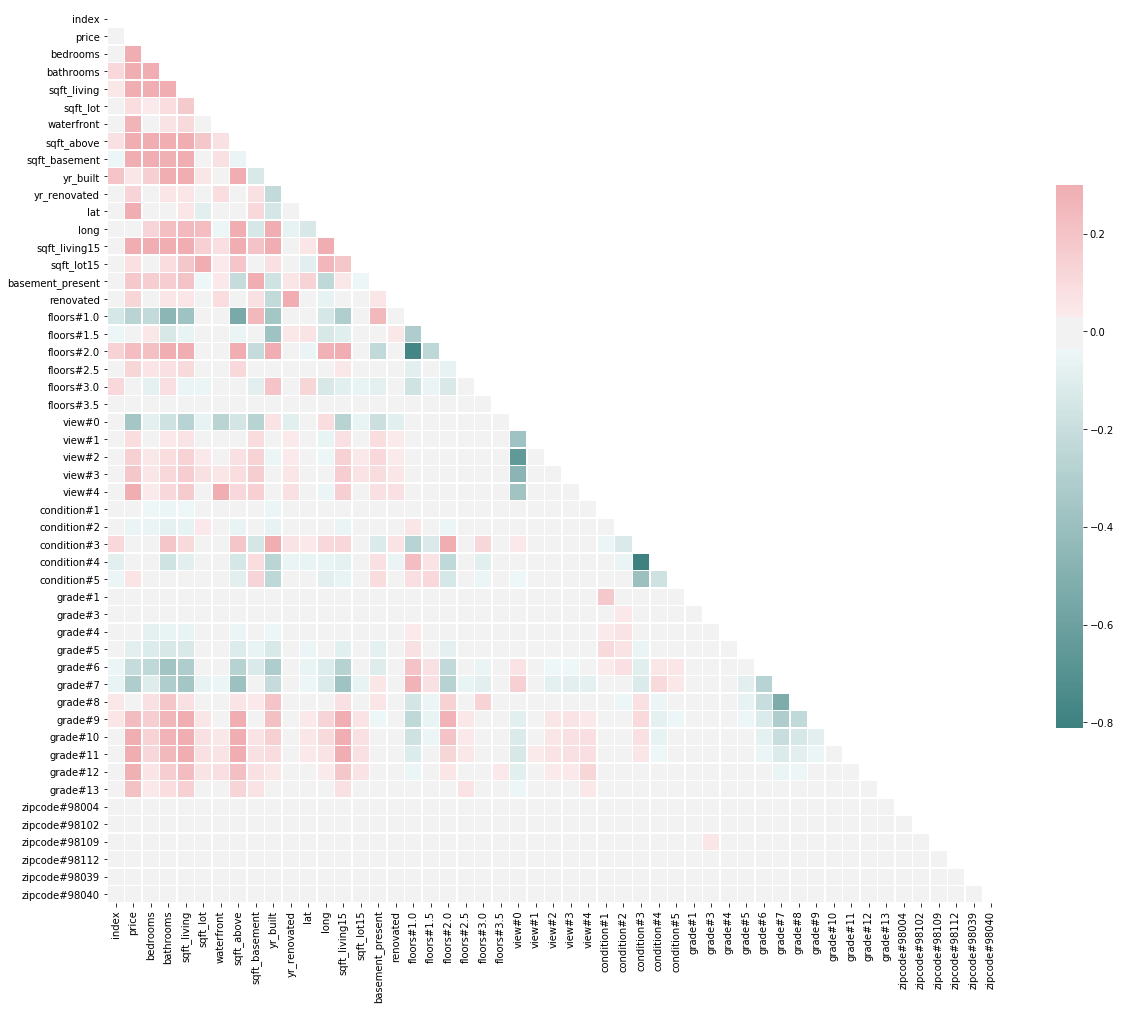

In [5]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

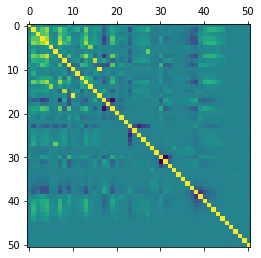

In [6]:
plt.matshow(features.corr())

In [7]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


Since "price" is our target variable and we are doing classification here, so we are calculating the median of our target variable to create two categories(1, -1).

In [8]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


# Part A
* Bagging Algo : Random Forest Classifier
* Boosting Algo : XGBoost Classifier

Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a classification problem.

Which hyper-parameters are important?
What hyper-parameter values work best?
Which supervised learner works best on the test data?

# A.1 Random Forest Classifier

In [20]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [21]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#### A.1.1 Random Forest : Base Model (Without Hyperparameter Tuning)

In [22]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
acc_clf = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy : %0.2f %%\n' % acc_clf)


Accuracy : 0.90 %



#### Classification Report
###### ->precision : 
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

###### ->recall : 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

###### ->f1 score : 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

- F1 = 2 * (precision * recall) / (precision + recall)
In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

###### ->support :
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [24]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         -1       0.91      0.90      0.90      3277
          1       0.90      0.90      0.90      3207

avg / total       0.90      0.90      0.90      6484



In [25]:
Confusion_Matrix(y_test, y_pred)

Confusion Matrix :  [[2965  312]
 [ 311 2896]]
Classification Accuracy :  0.9039173349784084
classification_error :  0.09608266502159162
sensitivity :  0.9030246336139695
specificity :  0.9047909673481843
false_positive_rate :  0.09520903265181568
precision :  0.9027431421446384


In [26]:
RF_Metrics = Print_Metrics(clf,y_test,X_test,y_pred)
Accuracy_LG_RF_Base = format(RF_Metrics['accuracy'])
R2_LG_RF_Base = format(RF_Metrics['r2'])
F1_LG_RF_Base = format(RF_Metrics['F1'])
AUC_LG_RF_Base = format(RF_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.31862  │
├───────────┼──────────┤
│ accuracy  │ 0.903917 │
├───────────┼──────────┤
│ precision │ 0.902743 │
├───────────┼──────────┤
│ F1        │ 0.902884 │
├───────────┼──────────┤
│ r2        │ 0.615625 │
├───────────┼──────────┤
│ AUC       │ 0.903908 │
╘═══════════╧══════════╛


In [27]:
check_stats(clf, 'Random Forest :Base Model', X_test, y_test,y_pred)

MODEL STATS: Random Forest :Base Model
loss:  1246
avg loss:  0.19216533004318323
accuracy:  90.39 %



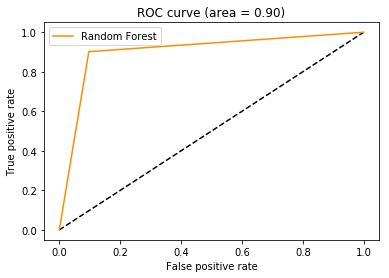

ROC for base model : 0.9023686932165763


In [28]:
print('ROC for base model : ' + str(evaluate(clf,X_train,y_train, X_test, y_test)))

In [29]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
#Return the feature importances (the higher, the more important the feature).
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.720653e-01
sqft_living         1.277930e-01
sqft_living15       1.069960e-01
sqft_above          7.379571e-02
long                5.417012e-02
sqft_lot15          5.314621e-02
yr_built            5.052292e-02
sqft_lot            4.810336e-02
bathrooms           2.957534e-02
sqft_basement       2.545317e-02
grade#7             2.350981e-02
bedrooms            1.936231e-02
grade#9             1.779564e-02
grade#6             1.345882e-02
grade#8             1.229540e-02
basement_present    9.344481e-03
view#0              8.705438e-03
floors#1.0          8.236319e-03
condition#3         5.872548e-03
floors#2.0          5.764565e-03
condition#4         4.154282e-03
grade#10            4.018985e-03
floors#1.5          3.901838e-03
condition#5         3.189766e-03
yr_renovated        2.931010e-03
view#2              1.877121e-03
renovated           1.643448e-03
view#4              1.279950e-03
zipcode#98004       1.244663e-03
floors#3.0          1.232500e-03
zipcode#98

In [31]:
#Taking top 10 features
top_features = feature_imp.head(10)
top_features

lat              0.272065
sqft_living      0.127793
sqft_living15    0.106996
sqft_above       0.073796
long             0.054170
sqft_lot15       0.053146
yr_built         0.050523
sqft_lot         0.048103
bathrooms        0.029575
sqft_basement    0.025453
dtype: float64

No handles with labels found to put in legend.


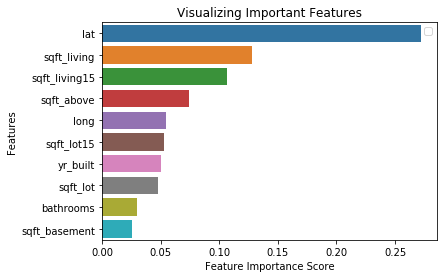

In [32]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [33]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


##### According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)

We will try adjusting the following set of hyperparameters:

## Finding important hyper-parameters

The important parameters for a Random Forest Classfier are as follows:

## A.1.2  We will use RandomSearchCV and GridSearchCV to find the best values for the same

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default). Pramrteres:

- bootstrap = method for sampling data points (with or without replacement)
- Class_weight = None -> all classes supposed to have weight one.
- criterion = The function to measure the quality of a split. Its default value is "gini". "Gini" is to minimize          misclassification.
- max_depth= max number of levels in each decision tree
- max_features= max number of features considered for splitting a node
- max_leaf_nodes= None -> Grow trees with unlimited number of leaf nodes defined as relative reduction in impurity.
- min_impurity_split= None -> A node will split if its impurity is above the threshold, otherwise it is a leaf.
- min_samples_leaf= min number of data points allowed in a leaf node
- min_samples_split= min number of data points placed in a node before the node is split
- min_weight_fraction_leaf=0 -> The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
- n_jobs=1 -> The number of jobs to run in parallel for both fit and predic
- oob_score=False -> Whether to use out-of-bag samples to estimate the generalization accuracy.
- random_state=None -> random_state is the random number generator
- verbose -> Controls the verbosity when fitting and predicting.
- warm_start=False -> fit a whole new forest

### (A) Random Forest Model : RandomSearchCV Hyper Parameter Tuning

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

### Evaluate Random Search

In [44]:
#base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
#base_model = RandomForestClassifier(n_estimators = 100)

In [37]:
best_random = clf_random.best_estimator_

In [38]:
y_pred_RandomizedSearchCV = best_random.predict(X_test)

In [39]:
acc_clf_RS = metrics.accuracy_score(y_test, y_pred_RandomizedSearchCV)
print('\nAccuracy : %0.2f %%\n' % acc_clf_RS)


Accuracy : 0.90 %



In [40]:
print(classification_report(y_test, y_pred_RandomizedSearchCV))

             precision    recall  f1-score   support

         -1       0.90      0.90      0.90      3277
          1       0.90      0.90      0.90      3207

avg / total       0.90      0.90      0.90      6484



In [41]:
Confusion_Matrix(y_test, y_pred_RandomizedSearchCV)

Confusion Matrix :  [[2952  325]
 [ 314 2893]]
Classification Accuracy :  0.9014497223935842
classification_error :  0.0985502776064158
sensitivity :  0.9020891799189273
specificity :  0.9008239243210253
false_positive_rate :  0.09917607567897467
precision :  0.899005593536358


In [42]:
RF_RS_Metrics = Print_Metrics(best_random,y_test,X_test,y_pred_RandomizedSearchCV)
Accuracy_LG_RF_RS = format(RF_RS_Metrics['accuracy'])
R2_LG_RF_RS = format(RF_RS_Metrics['r2'])
F1_LG_RF_RS = format(RF_RS_Metrics['F1'])
AUC_LG_RF_RS = format(RF_RS_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.40385  │
├───────────┼──────────┤
│ accuracy  │ 0.90145  │
├───────────┼──────────┤
│ precision │ 0.899006 │
├───────────┼──────────┤
│ F1        │ 0.900545 │
├───────────┼──────────┤
│ r2        │ 0.605753 │
├───────────┼──────────┤
│ AUC       │ 0.901457 │
╘═══════════╧══════════╛


In [43]:
check_stats(best_random, 'Random Forest :RandomizedSearchCV Model', X_test, y_test,y_pred_RandomizedSearchCV)

MODEL STATS: Random Forest :RandomizedSearchCV Model
loss:  1278
avg loss:  0.1971005552128316
accuracy:  90.14 %



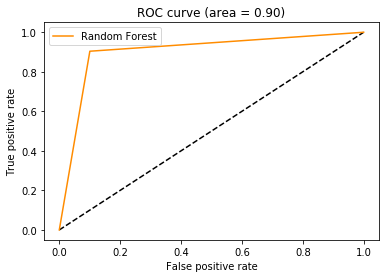

ROC for best model : 0.9017816915031479


In [44]:
print('ROC for Random Forest (RandomizedSearchCV) Model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

In [45]:
feature_imp_RS = pd.Series(best_random.feature_importances_,index=X_features).sort_values(ascending=False)
top_features_RS = feature_imp_RS.head(10)
top_features_RS

lat              0.296530
sqft_living      0.120742
sqft_living15    0.091321
sqft_above       0.076698
long             0.047600
sqft_lot15       0.046573
yr_built         0.045203
bathrooms        0.044702
sqft_lot         0.041820
grade#7          0.034066
dtype: float64

No handles with labels found to put in legend.


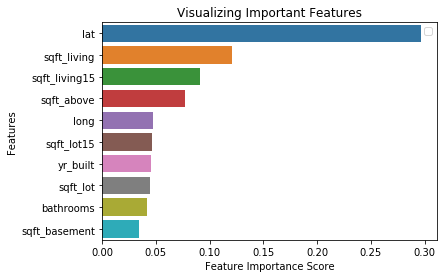

In [46]:
# Creating a bar plot
sns.barplot(x=top_features_RS, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### (B) Grid Search CV with hyperparameter tuning

In [47]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in vers

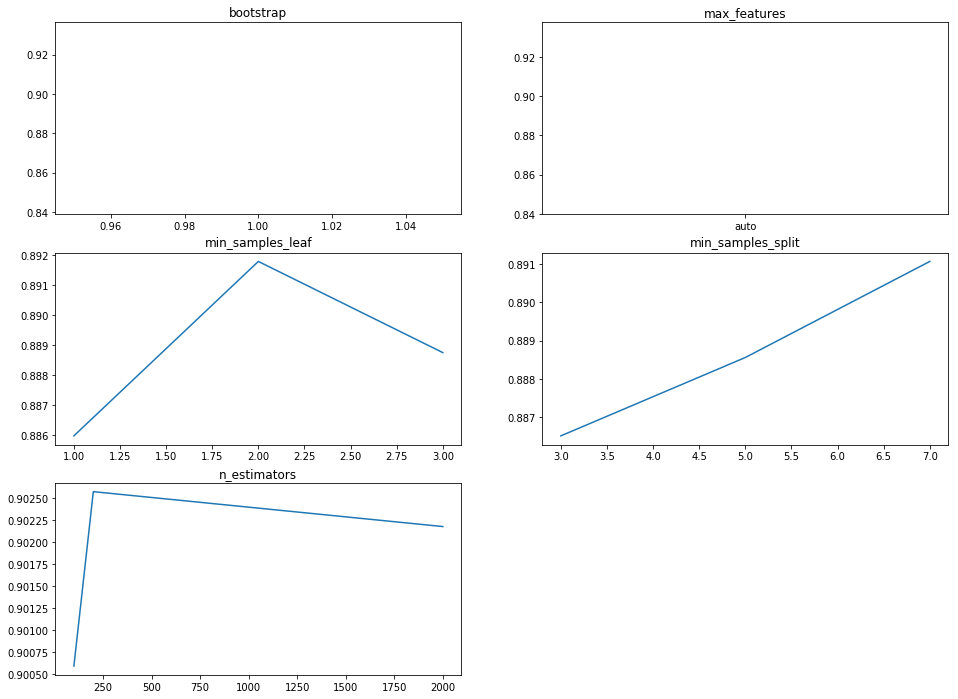

In [49]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(RandomForestClassifier(random_state=None),parameter, param_range, index, X_train,y_train)
    index += 1

In [50]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [51]:
best_grid = grid_search.best_estimator_

In [52]:
y_pred_GridSearchCV = best_grid.predict(X_test)

In [53]:
acc_clf_GS = metrics.accuracy_score(y_test, y_pred_GridSearchCV)
print('\nAccuracy : %0.2f %%\n' % acc_clf_GS)


Accuracy : 0.90 %



In [54]:
print(classification_report(y_test, y_pred_GridSearchCV))

             precision    recall  f1-score   support

         -1       0.91      0.90      0.90      3277
          1       0.90      0.90      0.90      3207

avg / total       0.90      0.90      0.90      6484



In [55]:
Confusion_Matrix(y_test, y_pred_GridSearchCV)

Confusion Matrix :  [[2952  325]
 [ 309 2898]]
Classification Accuracy :  0.9022208513263418
classification_error :  0.09777914867365824
sensitivity :  0.9036482694106641
specificity :  0.9008239243210253
false_positive_rate :  0.09917607567897467
precision :  0.8991622711759231


In [56]:
RF_GS_Metrics = Print_Metrics(best_grid,y_test,X_test,y_pred_GridSearchCV)

Accuracy_LG_RF_GS = format(RF_GS_Metrics['accuracy'])
R2_LG_RF_GS = format(RF_GS_Metrics['r2'])
F1_LG_RF_GS = format(RF_GS_Metrics['F1'])
AUC_LG_RF_GS = format(RF_GS_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.37721  │
├───────────┼──────────┤
│ accuracy  │ 0.902221 │
├───────────┼──────────┤
│ precision │ 0.899162 │
├───────────┼──────────┤
│ F1        │ 0.9014   │
├───────────┼──────────┤
│ r2        │ 0.608838 │
├───────────┼──────────┤
│ AUC       │ 0.902236 │
╘═══════════╧══════════╛


In [57]:
check_stats(best_grid, 'Random Forest :GridSearchCV Model', X_test, y_test,y_pred_GridSearchCV)

MODEL STATS: Random Forest :GridSearchCV Model
loss:  1268
avg loss:  0.19555829734731647
accuracy:  90.22 %



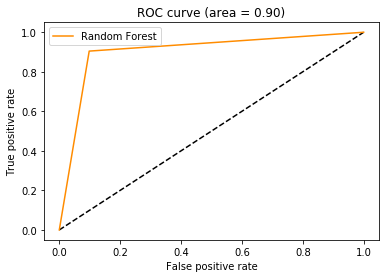

ROC for Random Forest (GridSearchCV) : 0.9031615594472686


In [59]:
print('ROC for Random Forest (GridSearchCV) : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

In [60]:
feature_imp_GS = pd.Series(best_grid.feature_importances_,index=X_features).sort_values(ascending=False)
top_features_GS = feature_imp_GS.head(10)
top_features_GS

lat              0.276761
sqft_living      0.122175
sqft_living15    0.094207
sqft_above       0.075120
long             0.053686
sqft_lot15       0.052442
yr_built         0.047937
sqft_lot         0.046651
bathrooms        0.037765
grade#7          0.028765
dtype: float64

No handles with labels found to put in legend.


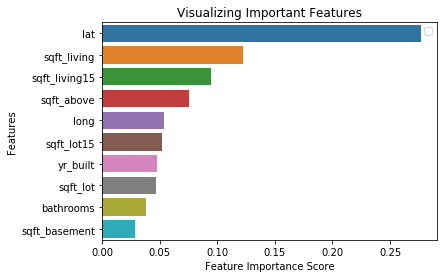

In [61]:
# Creating a bar plot
sns.barplot(x=top_features_GS, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### A.2 : Boosting Algo : XGBoost Classifier

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

#### A.2.1 XGBoost : Base Model (Without Hyperparameter Tuning)

In [62]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\DataScience\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [64]:
featureimp_xgboost = pd.Series(xgBoostClassifierModel.feature_importances_,index=X_features).sort_values(ascending=False)
featureimp_xgboost

lat                 0.293276
long                0.120172
sqft_living         0.107296
yr_built            0.072961
sqft_living15       0.067239
sqft_above          0.060086
sqft_lot            0.057225
grade#7             0.038627
view#0              0.035765
sqft_lot15          0.032904
grade#9             0.020029
grade#6             0.018598
bathrooms           0.012876
condition#3         0.011445
yr_renovated        0.010014
condition#5         0.008584
bedrooms            0.008584
grade#10            0.008584
waterfront          0.005722
grade#8             0.002861
sqft_basement       0.002861
condition#1         0.001431
floors#1.5          0.001431
zipcode#98004       0.001431
floors#2.5          0.000000
basement_present    0.000000
renovated           0.000000
floors#1.0          0.000000
floors#2.0          0.000000
zipcode#98040       0.000000
floors#3.0          0.000000
grade#4             0.000000
zipcode#98112       0.000000
zipcode#98109       0.000000
zipcode#98102 

In [65]:
top_features_xgboost = featureimp_xgboost.head(10)
top_features_xgboost

lat              0.293276
long             0.120172
sqft_living      0.107296
yr_built         0.072961
sqft_living15    0.067239
sqft_above       0.060086
sqft_lot         0.057225
grade#7          0.038627
view#0           0.035765
sqft_lot15       0.032904
dtype: float32

No handles with labels found to put in legend.


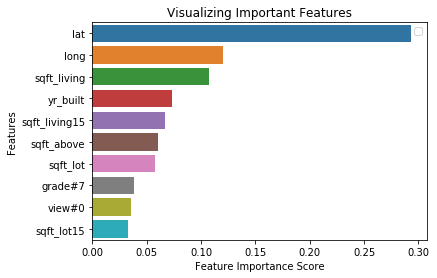

In [66]:
# Creating a bar plot
sns.barplot(x=top_features_xgboost, y=top_features_xgboost.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [67]:
# evaluate predictions
accuracy_xgBoost = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_xgBoost * 100.0))

Accuracy: 90.02%


In [68]:
XGB_Metrics = Print_Metrics(xgBoostClassifierModel,y_test,X_test,y_pred)

Accuracy_LG_XGB_Base = format(XGB_Metrics['accuracy'])
R2_LG_XGB_Base = format(XGB_Metrics['r2'])
F1_LG_XGB_Base = format(XGB_Metrics['F1'])
AUC_LG_XGB_Base = format(XGB_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.44646  │
├───────────┼──────────┤
│ accuracy  │ 0.900216 │
├───────────┼──────────┤
│ precision │ 0.894575 │
├───────────┼──────────┤
│ F1        │ 0.899705 │
├───────────┼──────────┤
│ r2        │ 0.600817 │
├───────────┼──────────┤
│ AUC       │ 0.900266 │
╘═══════════╧══════════╛


In [69]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgBoostClassifierModel.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}


### A.2.2 Hyperparameter  tuning by using GridSearchCV

Best: -0.213522 using {'n_estimators': 350}
-0.257542 (0.012270) with: {'n_estimators': 50}
-0.232205 (0.012719) with: {'n_estimators': 100}
-0.222690 (0.012904) with: {'n_estimators': 150}
-0.217965 (0.013056) with: {'n_estimators': 200}
-0.215482 (0.012978) with: {'n_estimators': 250}
-0.214347 (0.012837) with: {'n_estimators': 300}
-0.213522 (0.012592) with: {'n_estimators': 350}


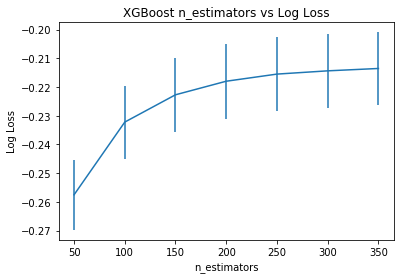

In [70]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [71]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Best: -0.210125 using {'max_depth': 7}
-0.331866 (0.008633) with: {'max_depth': 1}
-0.232205 (0.012719) with: {'max_depth': 3}
-0.213752 (0.011646) with: {'max_depth': 5}
-0.210125 (0.009419) with: {'max_depth': 7}
-0.213041 (0.010276) with: {'max_depth': 9}


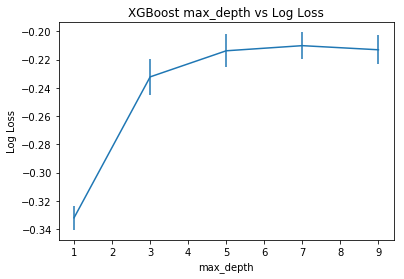

In [72]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

## Tune the min_child_weight Trees in XGBoost

In [73]:
model = XGBClassifier()
min_child_weight = range(1,6,2)
print(min_child_weight)
param_grid = dict(min_child_weight=min_child_weight)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 6, 2)
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.0s finished


Best: -0.232205 using {'min_child_weight': 1}
-0.232205 (0.012719) with: {'min_child_weight': 1}
-0.232542 (0.012117) with: {'min_child_weight': 3}
-0.232631 (0.012360) with: {'min_child_weight': 5}


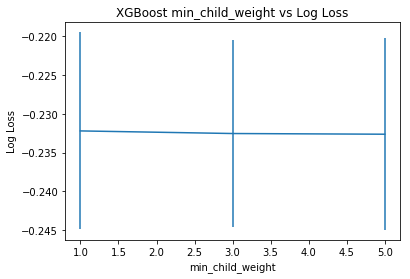

In [74]:
# plot
plt.errorbar(min_child_weight, means, yerr=stds)
plt.title("XGBoost min_child_weight vs Log Loss")
plt.xlabel('min_child_weight')
plt.ylabel('Log Loss')
plt.savefig('min_child_weight.png')

## Tune the gama Trees in XGBoost

In [75]:
model = XGBClassifier()
gamma = [i/10.0 for i in range(0,5)]
print(gamma)
param_grid = dict(gamma=gamma)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[0.0, 0.1, 0.2, 0.3, 0.4]
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.2s finished


Best: -0.231890 using {'gamma': 0.2}
-0.232205 (0.012719) with: {'gamma': 0.0}
-0.232120 (0.012663) with: {'gamma': 0.1}
-0.231890 (0.012548) with: {'gamma': 0.2}
-0.232349 (0.012261) with: {'gamma': 0.3}
-0.232398 (0.012351) with: {'gamma': 0.4}


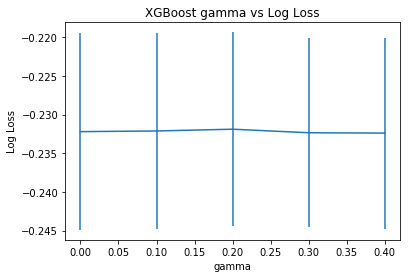

In [76]:
# plot
plt.errorbar(gamma, means, yerr=stds)
plt.title("XGBoost gamma vs Log Loss")
plt.xlabel('gamma')
plt.ylabel('Log Loss')
plt.savefig('gamma.png')

## Tune The Number of Trees , Max Depth in XGBoost
There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4410 or 160 models will be trained and evaluated.

In [77]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
#min_child_weight = range(1,6,2)
#gamma = [i/10.0 for i in range(0,5)]
#print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 14.3min finished


Best: -0.210154 using {'max_depth': 6, 'n_estimators': 250}
-0.213488 (0.010451) with: {'max_depth': 6, 'n_estimators': 350}
-0.211667 (0.010198) with: {'max_depth': 6, 'n_estimators': 300}
-0.210154 (0.010646) with: {'max_depth': 6, 'n_estimators': 250}
-0.215180 (0.010396) with: {'max_depth': 6, 'n_estimators': 400}
-0.218721 (0.010444) with: {'max_depth': 7, 'n_estimators': 350}
-0.215843 (0.010112) with: {'max_depth': 7, 'n_estimators': 300}
-0.213256 (0.009893) with: {'max_depth': 7, 'n_estimators': 250}
-0.222079 (0.010552) with: {'max_depth': 7, 'n_estimators': 400}
-0.227694 (0.011300) with: {'max_depth': 8, 'n_estimators': 350}
-0.223090 (0.011298) with: {'max_depth': 8, 'n_estimators': 300}
-0.218275 (0.011205) with: {'max_depth': 8, 'n_estimators': 250}
-0.231928 (0.012327) with: {'max_depth': 8, 'n_estimators': 400}
-0.236086 (0.011767) with: {'max_depth': 9, 'n_estimators': 350}
-0.230773 (0.011166) with: {'max_depth': 9, 'n_estimators': 300}
-0.225335 (0.011439) with: {'m

In [78]:
grid_result.best_params_

{'max_depth': 6, 'n_estimators': 250}

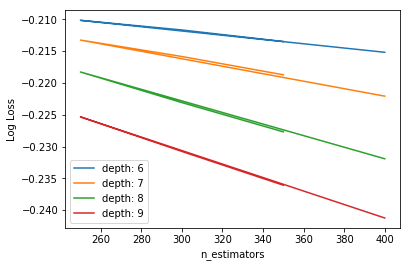

In [79]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=6).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters

In [80]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [81]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [82]:
model.fit(X_train, y_train)
y_pred_XGB = model.predict(X_test)
predictions_XGB = [round(value) for value in y_pred_XGB]

C:\DataScience\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
acc_clf_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print('\nAccuracy : %0.2f %%\n' % acc_clf_XGB)


Accuracy : 0.91 %



In [84]:
print(classification_report(y_test, y_pred_XGB))

             precision    recall  f1-score   support

         -1       0.91      0.91      0.91      3277
          1       0.91      0.91      0.91      3207

avg / total       0.91      0.91      0.91      6484



In [85]:
Confusion_Matrix(y_test, y_pred_XGB)

Confusion Matrix :  [[2989  288]
 [ 282 2925]]
Classification Accuracy :  0.9120913016656385
classification_error :  0.0879086983343615
sensitivity :  0.912067352666043
specificity :  0.9121147390906317
false_positive_rate :  0.08788526090936832
precision :  0.9103641456582633


In [86]:
#Print_Metrics(best_grid,y_test,X_test,y_pred_XGB)
XGB_GS_Metrics = Print_Metrics(model,y_test,X_test,y_pred_XGB)

Accuracy_LG_XGB_GS = format(XGB_GS_Metrics['accuracy'])
R2_LG_XGB_GS = format(XGB_GS_Metrics['r2'])
F1_LG_XGB_GS = format(XGB_GS_Metrics['F1'])
AUC_LG_XGB_GS = format(XGB_GS_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.03629  │
├───────────┼──────────┤
│ accuracy  │ 0.912091 │
├───────────┼──────────┤
│ precision │ 0.910364 │
├───────────┼──────────┤
│ F1        │ 0.911215 │
├───────────┼──────────┤
│ r2        │ 0.648324 │
├───────────┼──────────┤
│ AUC       │ 0.912091 │
╘═══════════╧══════════╛


In [87]:
check_stats(model, 'XGBoost Model', X_test, y_test,y_pred_XGB)

MODEL STATS: XGB Boost Model
loss:  1140
avg loss:  0.175817396668723
accuracy:  91.21 %



C:\DataScience\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


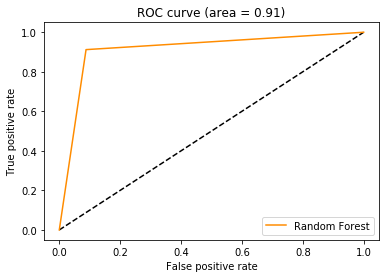

ROC for the XGBoost model is: 0.9120910458783373


In [88]:
print('ROC for the XGBoost model (by Hyperparameter tuning) is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

In [89]:
feature_imp_XGB = pd.Series(model.feature_importances_,index=X_features).sort_values(ascending=False)

top_features_XGB = feature_imp_XGB.head(10)
top_features_XGB

lat              0.176214
long             0.135194
sqft_lot         0.105825
sqft_living      0.087985
sqft_living15    0.083131
sqft_lot15       0.082160
yr_built         0.080461
sqft_above       0.076092
bathrooms        0.025728
sqft_basement    0.025485
dtype: float32

No handles with labels found to put in legend.


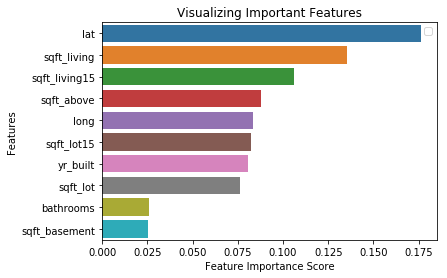

In [90]:
# Creating a bar plot
sns.barplot(x=top_features_XGB, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## B. Classification with Logistic Regression
Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

- Which independent variables are important?
- Is there multi-colinearity?
- How does it compare to the the models in Part A?
We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [91]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [92]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

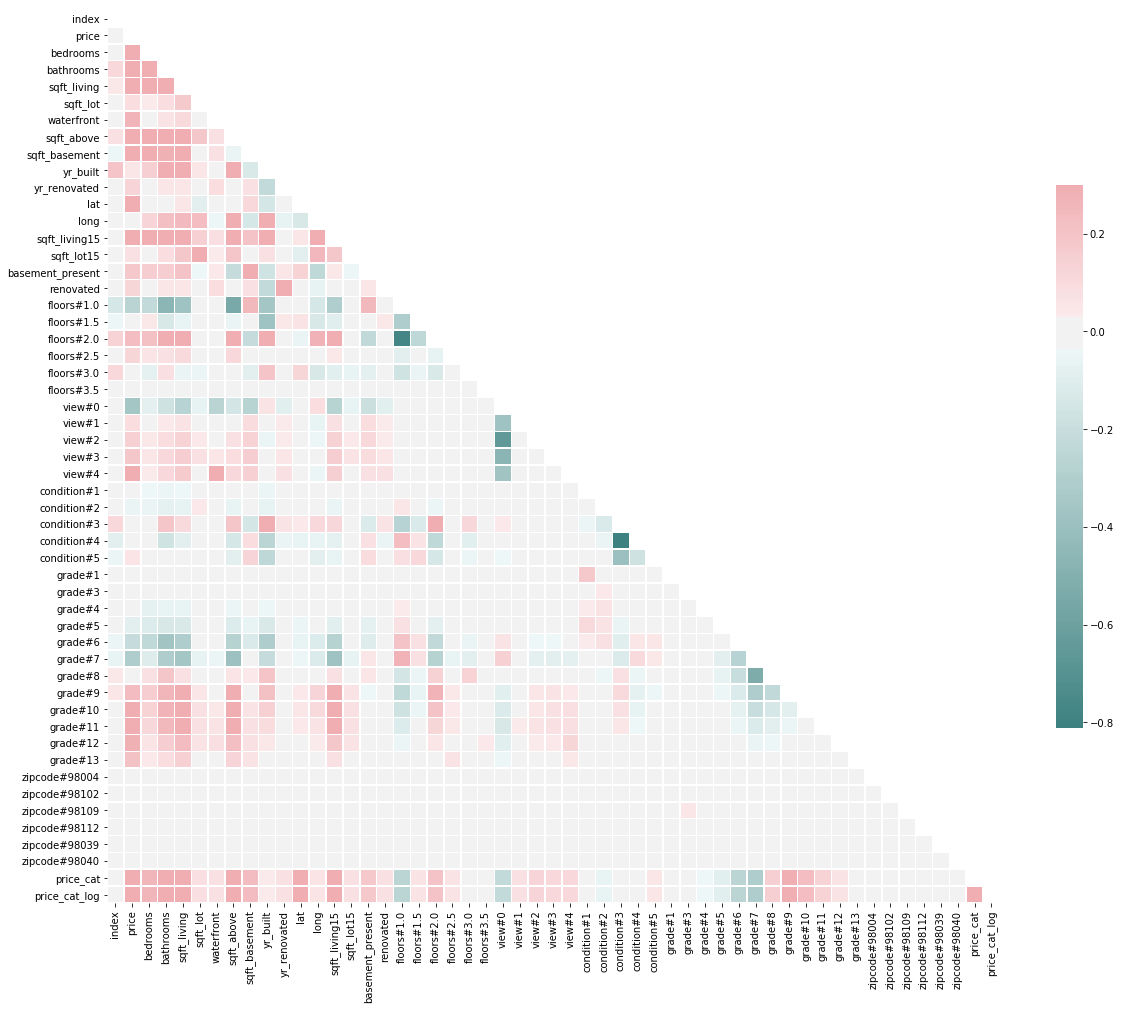

In [93]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [94]:
# Co-rrelation of all attributes with Quality.
corr_matrix = features.corr()
corr_matrix["price_cat_log"].sort_values(ascending=False)

price_cat_log       1.000000
price_cat           1.000000
price               0.605523
sqft_living         0.499589
sqft_living15       0.466654
sqft_above          0.427944
lat                 0.412956
bathrooms           0.396214
grade#9             0.293534
bedrooms            0.261068
sqft_basement       0.236043
grade#10            0.229101
floors#2.0          0.207561
basement_present    0.177949
grade#8             0.153653
grade#11            0.137188
view#2              0.126505
view#3              0.113002
view#4              0.112305
sqft_lot            0.084455
sqft_lot15          0.078839
yr_renovated        0.077271
renovated           0.076989
view#1              0.075908
waterfront          0.075872
grade#12            0.065010
floors#2.5          0.062342
floors#1.5          0.061646
long                0.060573
condition#5         0.051214
yr_built            0.032849
floors#3.0          0.030175
index               0.026732
grade#13            0.024664
floors#3.5    

In [95]:
## FInd the ratio of NAN missing values

print(features.isnull().any())
missing_ser_percentage = (features.isnull().sum()/features.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\nNaN ratio')
print(missing_ser_percentage)

index               False
price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
waterfront          False
sqft_above          False
sqft_basement       False
yr_built            False
yr_renovated        False
lat                 False
long                False
sqft_living15       False
sqft_lot15          False
basement_present    False
renovated           False
floors#1.0          False
floors#1.5          False
floors#2.0          False
floors#2.5          False
floors#3.0          False
floors#3.5          False
view#0              False
view#1              False
view#2              False
view#3              False
view#4              False
condition#1         False
condition#2         False
condition#3         False
condition#4         False
condition#5         False
grade#1             False
grade#3             False
grade#4             False
grade#5             False
grade#6             False
grade#7     

In [96]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [97]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront',
                                                                         'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [98]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [99]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        19:43:28   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

##### -  Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

In [100]:
y_pred_Logistic = logreg.predict(X_test_log)

In [101]:
print(classification_report(y_test_log, y_pred_Logistic))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74      3257
          1       0.75      0.68      0.72      3227

avg / total       0.73      0.73      0.73      6484



In [102]:
Confusion_Matrix(y_test_log, y_pred_Logistic)

Confusion Matrix :  [[2535  722]
 [1024 2203]]
Classification Accuracy :  0.7307217766810611
classification_error :  0.2692782233189389
sensitivity :  0.6826774093585374
specificity :  0.7783236106846791
false_positive_rate :  0.22167638931532085
precision :  0.7531623931623932


In [103]:
LR_Metrics = Print_Metrics(logreg,y_test_log,X_test_log,y_pred_Logistic)
#Print_Metrics(best_grid,y_test,X_test,y_pred_XGB)

Accuracy_LG_LR_Base = format(LR_Metrics['accuracy'])
R2_LG_LR_Base = format(LR_Metrics['r2'])
F1_LG_LR_Base = format(LR_Metrics['F1'])
AUC_LG_LR_Base = format(LR_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤═══════════╕
│ Metric    │      Test │
╞═══════════╪═══════════╡
│ logloss   │  9.30063  │
├───────────┼───────────┤
│ accuracy  │  0.730722 │
├───────────┼───────────┤
│ precision │  0.753162 │
├───────────┼───────────┤
│ F1        │  0.71619  │
├───────────┼───────────┤
│ r2        │ -0.077136 │
├───────────┼───────────┤
│ AUC       │  0.730501 │
╘═══════════╧═══════════╛


In [104]:
check_stats(logreg, 'Logistic Regresion', X_test_log, y_test_log,y_pred_Logistic)

MODEL STATS: Logistic Regresion
loss:  1746
avg loss:  0.2692782233189389
accuracy:  73.07 %



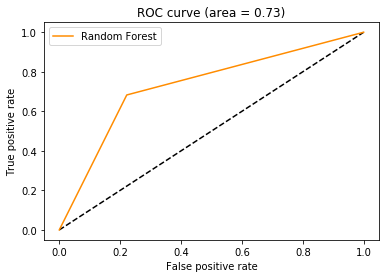

ROC for Logistic model : 0.7305005100216082


In [105]:
print('ROC for Logistic model : ' + str(evaluate(logreg,X_train_log,y_train_log, X_test_log, y_test_log)))

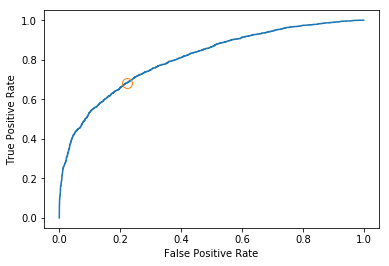

In [106]:
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [107]:
metrics.auc(falsepos, truepos)

0.8078695178147917

### As compared to Models in Part A, the accuracy of the Logistic Regression model is less.

## C. Regression


C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


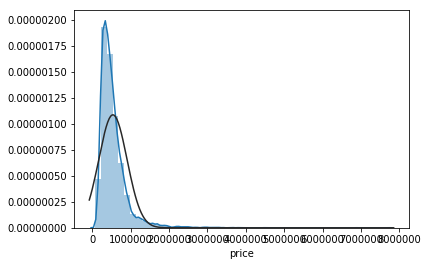

<Figure size 432x288 with 0 Axes>

In [108]:
#histogram and normal probability plot
sns.distplot(features['price'],fit=norm);
fig = plt.figure()

### C.1 Random Forest based Regression
To look at the available hyperparameters, we can create a random forest and examine the default values.

#### C.1.1 Base Model

In [116]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [117]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

In [118]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)

pred_y_basemodel = base_model.predict(X_test_reg)

base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)
accuracy_RF_Base = base_accuracy

Model Performance
Average Error: 73605.5282 degrees.
Accuracy = 86.15%.


In [119]:
error_metrics_basemodel = cal_rmse_cv(base_model,y_test_reg,pred_y_basemodel,X_train_reg,y_train_reg)

RMSE_RF_Base = format(error_metrics_basemodel['rmse'])
CV_RF_Base = format(error_metrics_basemodel['cv'])
R2_RF_Base = format(error_metrics_basemodel['r2'])
print('Root Mean Squared Error is : {}'.format(error_metrics_basemodel['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_basemodel['cv']))
print('r2 Score : {}'.format(error_metrics_basemodel['r2']))

Root Mean Squared Error is : 141707.04942646492
Cross Validation Score : 139468.94768915378
r2 Score : 0.8443501958875497


No handles with labels found to put in legend.


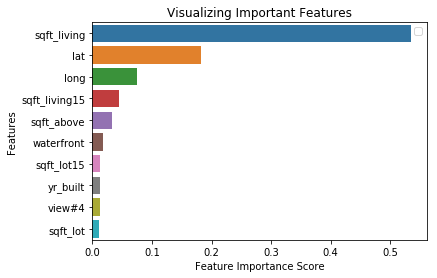

In [120]:
featureimp_RFR_BaseModel = pd.Series(base_model.feature_importances_,index=X_features_reg).sort_values(ascending=False)

#feature_imp.nlargest(10).plot(kind='barh')
top_featureimp_RFR_BaseModel = featureimp_RFR_BaseModel.head(10)

# Creating a bar plot
sns.barplot(x=top_featureimp_RFR_BaseModel, y=top_featureimp_RFR_BaseModel.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### C.1.2 (A) Hyperparameter Tuning by Randomized CV

In [121]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [122]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [123]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=152, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)
accuracy_RF_RS = random_accuracy

Model Performance
Average Error: 69489.4595 degrees.
Accuracy = 86.74%.


In [125]:
pred_y_best_random = best_random.predict(X_test_reg)

In [126]:
error_metrics_best_random = cal_rmse_cv(best_random,y_test_reg,pred_y_best_random,X_train_reg,y_train_reg)

RMSE_RF_RS = format(error_metrics_best_random['rmse'])
CV_RF_RS = format(error_metrics_best_random['cv'])
R2_RF_RS = format(error_metrics_best_random['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_best_random['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_best_random['cv']))
print('R2 Score : {}'.format(error_metrics_best_random['r2']))

Root Mean Squared Error is : 126663.76724127718
Cross Validation Score : 136264.41011215243
R2 Score : 0.8756429334261473


C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

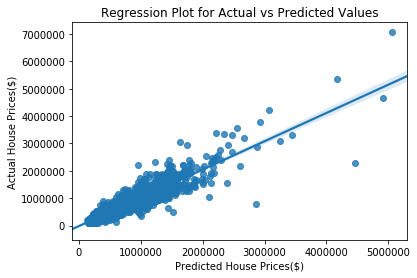

In [127]:
g = sns.regplot(x=pred_y_best_random, y=y_test_reg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

No handles with labels found to put in legend.


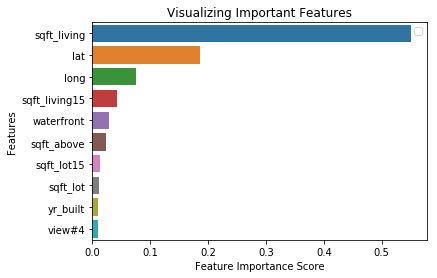

In [128]:
featureimp_RFR_random = pd.Series(best_random.feature_importances_,index=X_features_reg).sort_values(ascending=False)

#feature_imp.nlargest(10).plot(kind='barh')
top_featureimp_RFR_random = featureimp_RFR_random.head(10)

# Creating a bar plot
sns.barplot(x=top_featureimp_RFR_random, y=top_featureimp_RFR_random.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### C.1.2 (B) Hyperparameter Tuning by Grid Search CV

In [129]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [130]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 10.0min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [131]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)
accuracy_RF_GS = random_accuracy

Model Performance
Average Error: 89131.9164 degrees.
Accuracy = 82.26%.


In [132]:
pred_y_best_grid = best_grid.predict(X_test_reg)

In [133]:
error_metrics_best_grid = cal_rmse_cv(best_grid,y_test_reg,pred_y_best_grid,X_train_reg,y_train_reg)

RMSE_RF_GS = format(error_metrics_best_grid['rmse'])
CV_RF_GS = format(error_metrics_best_grid['cv'])
R2_RF_GS = format(error_metrics_best_grid['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_best_grid['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_best_grid['cv']))
print('R2 Score : {}'.format(error_metrics_best_grid['r2']))

Root Mean Squared Error is : 160305.06657027124
Cross Validation Score : 164498.3573617563
R2 Score : 0.8008133785724405


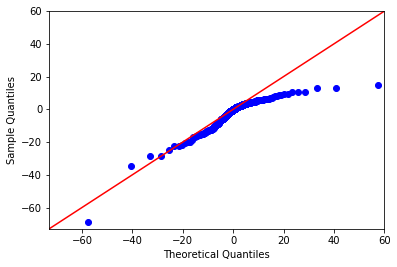

In [134]:
QQPlot(best_grid,pred_y_best_grid,y_test_reg)

Text(0.5,1,'Residual plot')

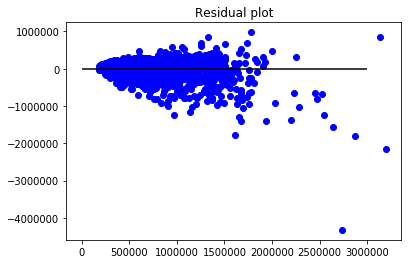

In [135]:
x_plot = plt.scatter(pred_y_best_grid, (pred_y_best_grid - y_test_reg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

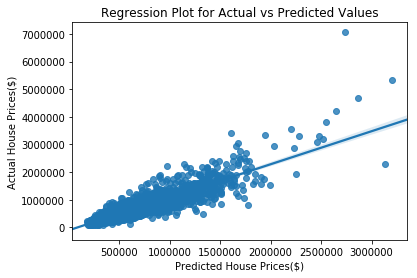

In [136]:
g = sns.regplot(x=pred_y_best_grid, y=y_test_reg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

No handles with labels found to put in legend.


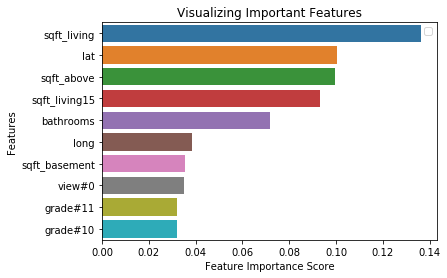

In [137]:
featureimp_RFR_grid = pd.Series(best_grid.feature_importances_,index=X_features_reg).sort_values(ascending=False)

#feature_imp.nlargest(10).plot(kind='barh')
top_featureimp_RFR_grid = featureimp_RFR_grid.head(10)

# Creating a bar plot
sns.barplot(x=top_featureimp_RFR_grid, y=top_featureimp_RFR_grid.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### C.2 XGBoost Regressor

#### C.2.1 Base Model

In [138]:
base_model_XGB = XGBRegressor()
base_model_XGB.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model_XGB, X_test_reg, y_test_reg)

Model Performance
Average Error: 80188.2979 degrees.
Accuracy = 84.46%.


In [139]:
base_model_XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
pred_y_basemodel_XGB = base_model_XGB.predict(X_test_reg)

In [141]:
Base_accuracy = evaluate_reg(base_model_XGB, X_test_reg, y_test_reg)
accuracy_XGB_Base = Base_accuracy
Base_accuracy

Model Performance
Average Error: 80188.2979 degrees.
Accuracy = 84.46%.


84.46094914747056

In [142]:
error_metrics_basemodel_XGB = cal_rmse_cv(base_model_XGB,y_test_reg,pred_y_basemodel_XGB,X_train_reg,y_train_reg)

RMSE_XGB_Base = format(error_metrics_basemodel_XGB['rmse'])
CV_XGB_Base = format(error_metrics_basemodel_XGB['cv'])
R2_XGB_Base = format(error_metrics_basemodel_XGB['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_basemodel_XGB['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_basemodel_XGB['cv']))
print('R2 Score : {}'.format(error_metrics_basemodel_XGB['r2']))

Root Mean Squared Error is : 135830.8227172878
Cross Validation Score : 142576.37324367274
R2 Score : 0.8569913423963614


##### C.2.2 XGBoost Regressor Hyperparameter Tuning (GridSearchCV)


In [143]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.708361 using {'n_estimators': 350}
0.677744 (0.018309) with: {'n_estimators': 50}
0.689800 (0.018601) with: {'n_estimators': 100}
0.696529 (0.018435) with: {'n_estimators': 150}
0.701034 (0.018265) with: {'n_estimators': 200}
0.703805 (0.017855) with: {'n_estimators': 250}
0.706352 (0.018301) with: {'n_estimators': 300}
0.708361 (0.018234) with: {'n_estimators': 350}


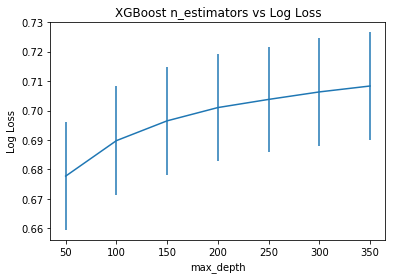

In [144]:
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_regressor.png')

##### XGBRegressor : max_depth

In [145]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\DataScience\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Best: 0.851767 using {'max_depth': 7}
0.652710 (0.045853) with: {'max_depth': 1}
0.805409 (0.034931) with: {'max_depth': 3}
0.848881 (0.030893) with: {'max_depth': 5}
0.851767 (0.030617) with: {'max_depth': 7}
0.849165 (0.032670) with: {'max_depth': 9}


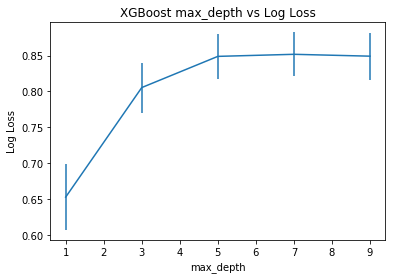

In [146]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('n_max_depth_regressor.png')

##### XGBRegressor : max_depth and n_estimator

In [147]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
#print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.0min finished


Best: 0.727887 using {'max_depth': 5, 'n_estimators': 300}
0.720498 (0.016273) with: {'max_depth': 4, 'n_estimators': 300}
0.721236 (0.015782) with: {'max_depth': 4, 'n_estimators': 350}
0.721531 (0.015737) with: {'max_depth': 4, 'n_estimators': 400}
0.727887 (0.013778) with: {'max_depth': 5, 'n_estimators': 300}
0.727151 (0.013485) with: {'max_depth': 5, 'n_estimators': 350}
0.726394 (0.014279) with: {'max_depth': 5, 'n_estimators': 400}
0.726553 (0.013571) with: {'max_depth': 6, 'n_estimators': 300}
0.725079 (0.013920) with: {'max_depth': 6, 'n_estimators': 350}
0.724169 (0.013656) with: {'max_depth': 6, 'n_estimators': 400}
0.723697 (0.013786) with: {'max_depth': 7, 'n_estimators': 300}
0.722286 (0.013669) with: {'max_depth': 7, 'n_estimators': 350}
0.721103 (0.013627) with: {'max_depth': 7, 'n_estimators': 400}


In [148]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 300}

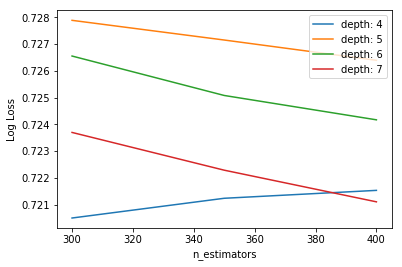

In [149]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth_regresor.png')

In [150]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy_XGBoost = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)
accuracy_XGB_GS = best_accuracy_XGBoost

Model Performance
Average Error: 65511.7815 degrees.
Accuracy = 87.36%.


In [152]:
pred_y_bestmodel_XGB = best_XGBoost.predict(X_test_reg)

In [153]:
error_metrics_bestmodel_XGB = cal_rmse_cv(best_XGBoost,y_test_reg,pred_y_bestmodel_XGB,X_train_reg,y_train_reg)

RMSE_XGB_GS = format(error_metrics_bestmodel_XGB['rmse'])
CV_XGB_GS = format(error_metrics_bestmodel_XGB['cv'])
R2_XGB_GS = format(error_metrics_bestmodel_XGB['r2'])
print('Root Mean Squared Error is : {}'.format(error_metrics_bestmodel_XGB['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_bestmodel_XGB['cv']))
print('R2 Score : {}'.format(error_metrics_bestmodel_XGB['r2']))

Root Mean Squared Error is : 117779.74264152514
Cross Validation Score : 120477.25582572373
R2 Score : 0.8924756391531112


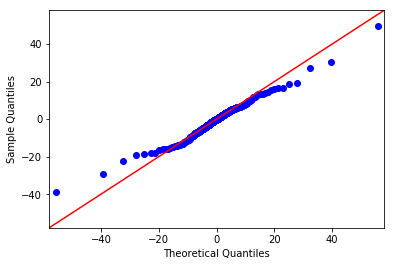

In [154]:
QQPlot(best_XGBoost,pred_y_bestmodel_XGB,y_test_reg)

Text(0.5,1,'Residual plot')

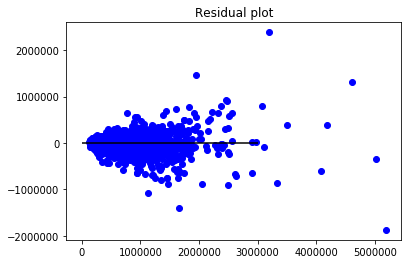

In [155]:
x_plot = plt.scatter(pred_y_bestmodel_XGB, (pred_y_bestmodel_XGB - y_test_reg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

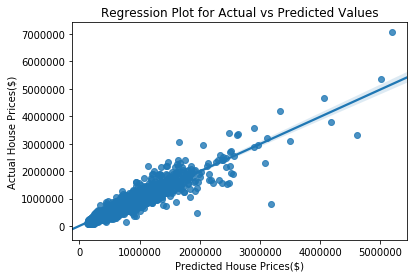

In [156]:
g = sns.regplot(x=pred_y_bestmodel_XGB, y=y_test_reg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

No handles with labels found to put in legend.


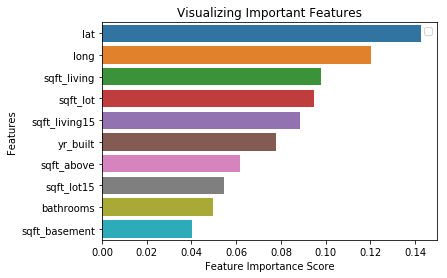

In [157]:
featureimp_best_XGBoost = pd.Series(best_XGBoost.feature_importances_,index=X_features_reg).sort_values(ascending=False)

#feature_imp.nlargest(10).plot(kind='barh')
top_featureimp_best_XGBoost = featureimp_best_XGBoost.head(10)

# Creating a bar plot
sns.barplot(x=top_featureimp_best_XGBoost, y=top_featureimp_best_XGBoost.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## D. Linear Regression

In [158]:
# Co-rrelation of all attributes with PRICE
corr_matrix = features.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
sqft_living         0.702035
sqft_above          0.605567
price_cat_log       0.605523
price_cat           0.605523
sqft_living15       0.585379
bathrooms           0.525138
grade#11            0.357412
grade#10            0.340799
sqft_basement       0.323816
bedrooms            0.308350
view#4              0.307932
lat                 0.307003
grade#12            0.290834
waterfront          0.266369
grade#9             0.235897
floors#2.0          0.232662
grade#13            0.211803
view#3              0.182880
basement_present    0.180230
view#2              0.148418
yr_renovated        0.126434
renovated           0.126092
floors#2.5          0.122770
view#1              0.092607
sqft_lot            0.089661
sqft_lot15          0.082447
condition#5         0.057585
yr_built            0.054012
index               0.027372
long                0.021626
floors#3.5          0.020611
floors#3.0          0.019750
floors#1.5          0.016023
condition#3   

In [159]:
# independent variables with high VIF values are not good for Model.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif.round(1)

C:\DataScience\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.100000e+00,index
1,4.000000e+00,price
2,1.700000e+00,bedrooms
3,3.500000e+00,bathrooms
4,inf,sqft_living
5,2.100000e+00,sqft_lot
6,1.600000e+00,waterfront
7,inf,sqft_above
8,inf,sqft_basement
9,3.200000e+00,yr_built


In [160]:
y_reg = features['price']
X_reg = features.drop('price',axis = 1)

In [161]:
# Ordinary Least Squares 
X2_reg = sm.add_constant(X_reg)
est_reg = sm.OLS(y_reg, X2_reg)
est2_reg = est_reg.fit()
print(est2_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1404.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:55:44   Log-Likelihood:            -2.9264e+05
No. Observations:               21613   AIC:                         5.854e+05
Df Residuals:                   21566   BIC:                         5.857e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.589e+07   8.09e+05  

##### As the P> 0.05 for sqft_lot , basement_present and all zipcode#* we are going to remove this from final model


In [162]:
y_reg = features['price']
X_reg = features[['sqft_living','sqft_above','price_cat_log','price_cat','sqft_living15','bathrooms','grade#11','grade#10','sqft_basement','bedrooms','view#4','lat','grade#12','waterfront','grade#9','floors#2.0','grade#13','view#3','view#2','yr_renovated','renovated','floors#2.5','view#1','sqft_lot15','condition#5','yr_built','index','long','floors#3.5','floors#3.0','floors#1.5','condition#3','grade#8','grade#1','grade#3','condition#1','condition#4','grade#4','condition#2','grade#5','grade#6','floors#1.0','grade#7','view#0']]
#X_reg = features[['bedrooms','bathrooms','waterfront','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','basement_present','renovated']]

In [163]:
# Ordinary Least Squares 
X2_reg = sm.add_constant(X_reg)
est_reg = sm.OLS(y_reg, X2_reg)
est2_reg = est_reg.fit()
print(est2_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1700.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:56:40   Log-Likelihood:            -2.9264e+05
No. Observations:               21613   AIC:                         5.854e+05
Df Residuals:                   21574   BIC:                         5.857e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.564e+07      8e+05    -19.537

In [164]:
train_x_linreg,test_x_linreg,train_y_linreg,test_y_linreg = train_test_split(X_reg,y_reg,random_state = 0, test_size=0.3) #, stratify = y_reg

In [165]:
lm= LinearRegression()

# Fit model
lm.fit(train_x_linreg,train_y_linreg)

# Predict
y_pred_test_lm = lm.predict(test_x_linreg)

In [166]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_reg.columns, lm.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,sqft_living,8.274086e+09
1,sqft_above,-8.274086e+09
2,price_cat_log,-2.403214e+13
3,price_cat,1.201607e+13
4,sqft_living15,2.246893e+01
5,bathrooms,3.870204e+04
6,grade#11,-1.020110e+12
7,grade#10,-1.020110e+12
8,sqft_basement,-8.274086e+09
9,bedrooms,-1.684911e+04


In [167]:
lm.intercept_

32065882338034.742

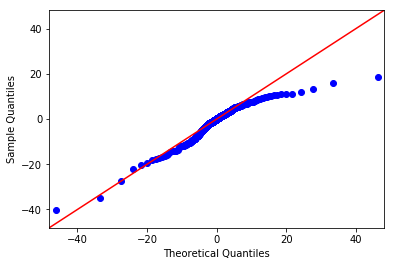

In [168]:
QQPlot(lm,y_pred_test_lm,test_y_linreg)

In [169]:
best_accuracy_LR = evaluate_reg(lm, test_x_linreg, test_y_linreg)
accuracy_LR = best_accuracy_LR

Model Performance
Average Error: 107526.2542 degrees.
Accuracy = 80.32%.


In [170]:
error_metrics_lm = cal_rmse_cv(lm,test_y_linreg,y_pred_test_lm,train_x_linreg,train_y_linreg)

RMSE_LR = format(error_metrics_lm['rmse'])
CV_LR = format(error_metrics_lm['cv'])
R2_LR = format(error_metrics_lm['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_lm['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_lm['cv']))
print('R2 Score : {}'.format(error_metrics_lm['r2']))

Root Mean Squared Error is : 187497.50444495093
Cross Validation Score : 16034048.127635846
R2 Score : 0.7348931887269605


Text(0.5,1,'Residual plot')

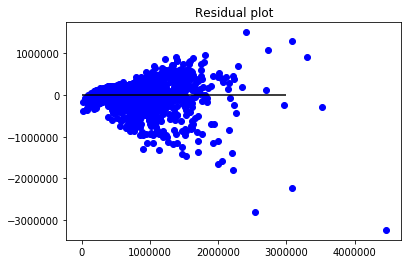

In [171]:
x_plot = plt.scatter(y_pred_test_lm, (y_pred_test_lm - test_y_linreg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

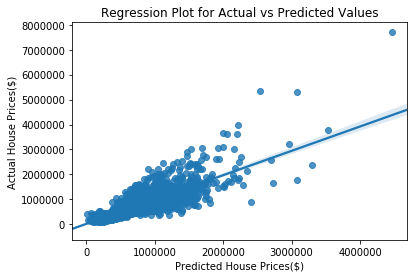

In [172]:
g = sns.regplot(x=y_pred_test_lm, y=test_y_linreg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

### D.2 Regression Regularization (Ridge Regression)

 bias-variance trade-off problem in linear regression and how it can be solved with regularization.

In [186]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for RidgeCV
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
# Fit the model to our training data
ridge_reg.fit(train_x_linreg,train_y_linreg)

RidgeCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [187]:
alpha_ridge_cv = ridge_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_ridge_cv))

The estimated best regularization parameter is: 0.0


#### D.2.1 Base Model

In [188]:
 # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr = Ridge(alpha=0)

# Fit model
rr.fit(train_x_linreg,train_y_linreg)

# Predict
y_pred_test_rr = rr.predict(test_x_linreg)

In [189]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_reg.columns, rr.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,sqft_living,-1.768868e+15
1,sqft_above,1.768868e+15
2,price_cat_log,1.387457e+14
3,price_cat,-6.937286e+13
4,sqft_living15,2.213269e+01
5,bathrooms,3.623905e+04
6,grade#11,6.871953e+13
7,grade#10,6.871953e+13
8,sqft_basement,1.768868e+15
9,bedrooms,-1.498216e+04


In [190]:
rr.intercept_

102994305883194.42

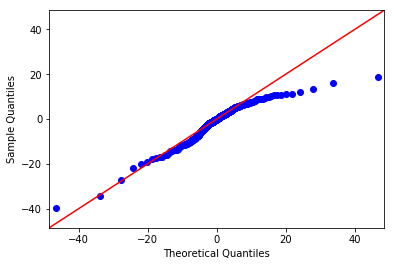

In [191]:
QQPlot(rr,y_pred_test_rr,test_y_linreg)

In [192]:
best_accuracy_RR = evaluate_reg(rr, test_x_linreg, test_y_linreg)
accuracy_RR_Base = best_accuracy_RR

Model Performance
Average Error: 108080.3645 degrees.
Accuracy = 80.18%.


In [193]:
error_metrics_rr = cal_rmse_cv(rr,test_y_linreg,y_pred_test_rr,train_x_linreg,train_y_linreg)


RMSE_RR_Base = format(error_metrics_rr['rmse'])
CV_RR_Base = format(error_metrics_rr['cv'])
R2_RR_Base = format(error_metrics_rr['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_rr['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_rr['cv']))
print('R2 Score : {}'.format(error_metrics_rr['r2']))

Root Mean Squared Error is : 187682.30296822803
Cross Validation Score : 62594489746.906456
R2 Score : 0.7343703498716552


Text(0.5,1,'Residual plot')

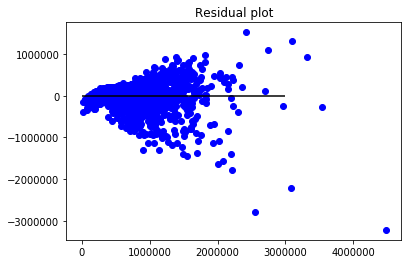

In [194]:
x_plot = plt.scatter(y_pred_test_rr, (y_pred_test_rr - test_y_linreg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

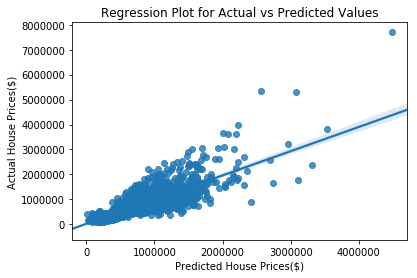

In [195]:
g = sns.regplot(x=y_pred_test_rr, y=test_y_linreg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

#### D.2.2 Alpha Tuning using GridSearchCV

In [198]:
#Create an object of type Ridge() 
ridge = Ridge() 
# Fit the model on the trainng data. 
ridge.fit(train_x_linreg, train_y_linreg)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [199]:
# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'r2')

# Fit the training model 
ridge_grid.fit(train_x_linreg, train_y_linreg)

# Get the best alpha value and it's respective R2 score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
#print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],r2_score(ridge_grid.predict(X_test), Y_test)))

C:\DataScience\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.028310e-23
  overwrite_a=True).T
C:\DataScience\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.053294e-23
  overwrite_a=True).T
C:\DataScience\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.028435e-21
  overwrite_a=True).T
C:\DataScience\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.051246e-21
  overwrite_a=True).T
C:\DataScience\lib\site-packages\sklearn\linear_

Best alpha value is: 5


In [200]:
 # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr_grid = Ridge(alpha=5)

# Fit model
rr_grid.fit(train_x_linreg,train_y_linreg)

# Predict
y_pred_test_rr_grid = rr_grid.predict(test_x_linreg)

In [201]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_reg.columns, rr_grid.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,sqft_living,8.031375e+01
1,sqft_above,5.150427e+01
2,price_cat_log,3.009099e+04
3,price_cat,6.018198e+04
4,sqft_living15,2.218798e+01
5,bathrooms,4.167732e+04
6,grade#11,2.442006e+05
7,grade#10,-4.849041e+04
8,sqft_basement,2.880963e+01
9,bedrooms,-1.948360e+04


In [202]:
rr_grid.intercept_

-32002627.235908143

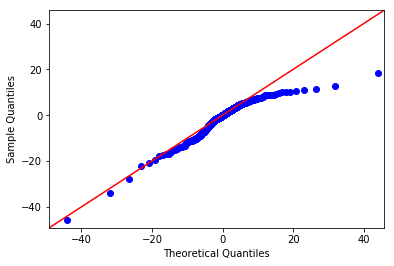

In [203]:
QQPlot(rr_grid,y_pred_test_rr_grid,test_y_linreg)

In [204]:
best_accuracy_RR_Grid = evaluate_reg(rr_grid, test_x_linreg, test_y_linreg)
accuracy_RR_Grid = best_accuracy_RR_Grid

Model Performance
Average Error: 108198.1534 degrees.
Accuracy = 80.10%.


In [205]:
error_metrics_rr_grid = cal_rmse_cv(rr_grid,test_y_linreg,y_pred_test_rr_grid,train_x_linreg,train_y_linreg)


RMSE_rr_grid = format(error_metrics_rr_grid['rmse'])
CV_rr_grid = format(error_metrics_rr_grid['cv'])
R2_rr_grid = format(error_metrics_rr_grid['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_rr_grid['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_rr_grid['cv']))
print('R2 Score : {}'.format(error_metrics_rr_grid['r2']))

Root Mean Squared Error is : 188567.4072780782
Cross Validation Score : 185872.64504149297
R2 Score : 0.7318590386794801


Text(0.5,1,'Residual plot')

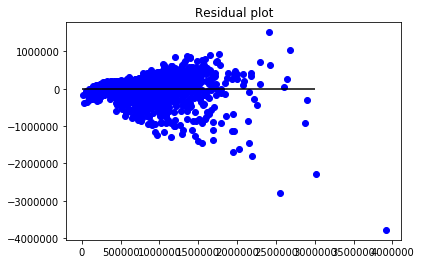

In [206]:
x_plot = plt.scatter(y_pred_test_rr_grid, (y_pred_test_rr_grid - test_y_linreg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

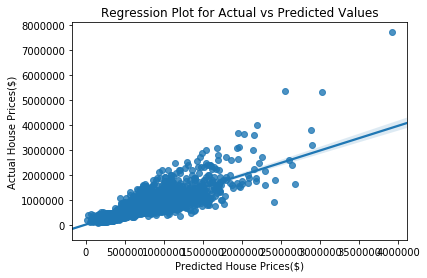

In [207]:
g = sns.regplot(x=y_pred_test_rr_grid, y=test_y_linreg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

### E.1  Ada Boost Classifier

##### E.1.1 Base Model

In [208]:
#Create a Ada Boost Classifier
ada_cls =AdaBoostClassifier()

# Fit
ada_cls.fit(X_train,y_train)

# Predict
y_pred_ada_cls = ada_cls.predict(X_test)

In [209]:
acc_ada_cls = metrics.accuracy_score(y_test, y_pred_ada_cls)
print('\nAccuracy : %0.2f %%\n' % acc_ada_cls)


Accuracy : 0.89 %



In [210]:
print(classification_report(y_test, y_pred_ada_cls))

             precision    recall  f1-score   support

         -1       0.89      0.89      0.89      3277
          1       0.89      0.89      0.89      3207

avg / total       0.89      0.89      0.89      6484



In [211]:
Confusion_Matrix(y_test, y_pred_ada_cls)

Confusion Matrix :  [[2908  369]
 [ 362 2845]]
Classification Accuracy :  0.8872609500308452
classification_error :  0.11273904996915485
sensitivity :  0.8871219207982538
specificity :  0.8873970094598719
false_positive_rate :  0.11260299054012816
precision :  0.8851897946484132


In [212]:
ADA_Metrics = Print_Metrics(ada_cls,y_test,X_test,y_pred_ada_cls)
#Print_Metrics(best_grid,y_test,X_test,y_pred_XGB)

Accuracy_LG_ADA_Base = format(ADA_Metrics['accuracy'])
R2_LG_ADA_Base = format(ADA_Metrics['r2'])
F1_LG_ADA_Base = format(ADA_Metrics['F1'])
AUC_LG_ADA_Base = format(ADA_Metrics['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.89391  │
├───────────┼──────────┤
│ accuracy  │ 0.887261 │
├───────────┼──────────┤
│ precision │ 0.88519  │
├───────────┼──────────┤
│ F1        │ 0.886155 │
├───────────┼──────────┤
│ r2        │ 0.548991 │
├───────────┼──────────┤
│ AUC       │ 0.887259 │
╘═══════════╧══════════╛


In [213]:
check_stats(ada_cls, 'Ada Boost Classifier :Base Model', X_test, y_test,y_pred_ada_cls)

MODEL STATS: Ada Boost Classifier :Base Model
loss:  1462
avg loss:  0.2254780999383097
accuracy:  88.73 %



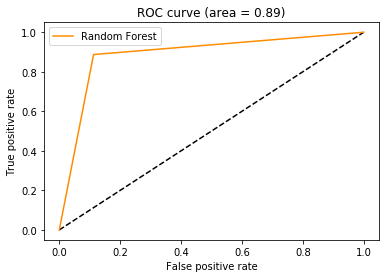

ROC for Ada Boost Classifier base model : 0.8872594651290628


In [214]:
print('ROC for Ada Boost Classifier base model : ' + str(evaluate(ada_cls,X_train,y_train, X_test, y_test)))

No handles with labels found to put in legend.


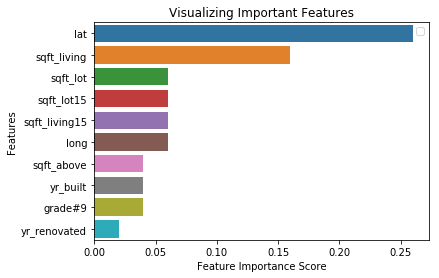

In [215]:
featureimp_ada_cls = pd.Series(ada_cls.feature_importances_,index=X_features).sort_values(ascending=False)

top_featureimp_ada_cls = featureimp_ada_cls.head(10)
top_featureimp_ada_cls

# Creating a bar plot
sns.barplot(x=top_featureimp_ada_cls, y=top_featureimp_ada_cls.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [216]:
# Look at parameters used by base model
print('Parameters currently in use:\n')
pprint(ada_cls.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


##### E.1.2 hyperparameter tuning (GridSearchCV)

In [217]:

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
learning_rate = [0.05, 0.1, 0.5, 1, 2]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
               }
pprint(random_grid)


{'learning_rate': [0.05, 0.1, 0.5, 1, 2],
 'n_estimators': [10, 57, 105, 152, 200]}


C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


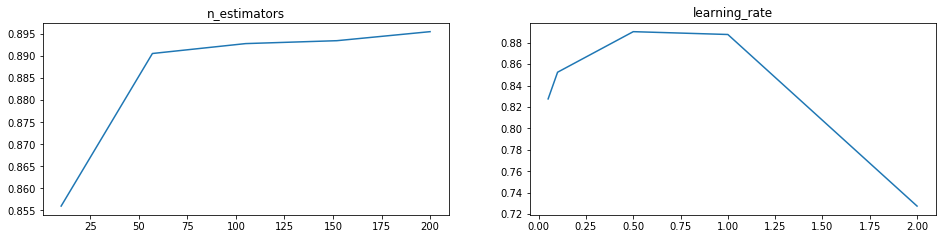

In [218]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(random_grid):   
    evaluate_param(AdaBoostClassifier(random_state=77),parameter, param_range, index, X_train, y_train)
    index += 1

In [219]:
GS = GridSearchCV(AdaBoostClassifier(random_state=77),
                  random_grid,
                  cv=4)
GS.fit(X_train, y_train)


GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=77),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 57, 105, 152, 200], 'learning_rate': [0.05, 0.1, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [220]:
GS.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [221]:
best_GS_Grid = GS.best_estimator_
y_pred_GS_Grid = best_GS_Grid.predict(X_test)

In [222]:
acc_GS_Grid = metrics.accuracy_score(y_test, y_pred_GS_Grid)
print('\nAccuracy : %0.2f %%\n' % acc_GS_Grid)


Accuracy : 0.90 %



In [223]:
print(classification_report(y_test, y_pred_GS_Grid))

             precision    recall  f1-score   support

         -1       0.90      0.90      0.90      3277
          1       0.90      0.89      0.90      3207

avg / total       0.90      0.90      0.90      6484



In [224]:
Confusion_Matrix(y_test, y_pred_GS_Grid)

Confusion Matrix :  [[2948  329]
 [ 343 2864]]
Classification Accuracy :  0.8963602714373843
classification_error :  0.10363972856261566
sensitivity :  0.8930464608668538
specificity :  0.8996032956972841
false_positive_rate :  0.1003967043027159
precision :  0.8969621046038209


In [225]:
ADA_Metrics_GS = Print_Metrics(best_GS_Grid,y_test,X_test,y_pred_GS_Grid)

Accuracy_LG_ADA_GS = format(ADA_Metrics_GS['accuracy'])
R2_LG_ADA_GS = format(ADA_Metrics_GS['r2'])
F1_LG_ADA_GS = format(ADA_Metrics_GS['F1'])
AUC_LG_ADA_GS = format(ADA_Metrics_GS['AUC'])


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ logloss   │ 3.57963  │
├───────────┼──────────┤
│ accuracy  │ 0.89636  │
├───────────┼──────────┤
│ precision │ 0.896962 │
├───────────┼──────────┤
│ F1        │ 0.895    │
├───────────┼──────────┤
│ r2        │ 0.585393 │
├───────────┼──────────┤
│ AUC       │ 0.896325 │
╘═══════════╧══════════╛


In [226]:
check_stats(best_random, 'Ada Boost Classifier :Grid search', X_test, y_test,y_pred_GS_Grid)

MODEL STATS: Ada Boost Classifier :Grid search
loss:  1344
avg loss:  0.20727945712523133
accuracy:  89.64 %



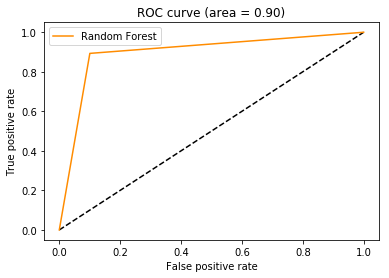

ROC for Ada Boost Classifier :Grid search : 0.896324878282069


In [227]:
print('ROC for Ada Boost Classifier :Grid search : ' + str(evaluate(best_GS_Grid,X_train,y_train, X_test, y_test)))

No handles with labels found to put in legend.


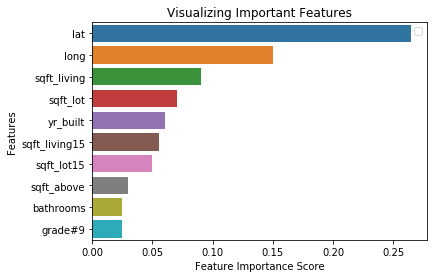

In [228]:
featureimp_ada_GS = pd.Series(best_GS_Grid.feature_importances_,index=X_features).sort_values(ascending=False)

top_featureimp_ada_GS = featureimp_ada_GS.head(10)
top_featureimp_ada_GS

# Creating a bar plot
sns.barplot(x=top_featureimp_ada_GS, y=top_featureimp_ada_GS.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### E.2 Ada Boosting Regressor

##### E.2.1 Base Model

In [229]:
Ada_Base = AdaBoostRegressor()

# Fit model
Ada_Base.fit(train_x_linreg,train_y_linreg)

# Predict
y_pred_test_Ada_Base = Ada_Base.predict(test_x_linreg)

In [230]:
best_accuracy_Ada_Base = evaluate_reg(Ada_Base, test_x_linreg, test_y_linreg)
accuracy_Ada_Base = best_accuracy_Ada_Base

Model Performance
Average Error: 332753.2415 degrees.
Accuracy = 13.23%.


In [231]:
error_metrics_Ada_Base = cal_rmse_cv(Ada_Base,test_y_linreg,y_pred_test_Ada_Base,train_x_linreg,train_y_linreg)

RMSE_Ada_Base = format(error_metrics_Ada_Base['rmse'])
CV_Ada_Base = format(error_metrics_Ada_Base['cv'])
R2_Ada_Base = format(error_metrics_Ada_Base['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_Ada_Base['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_Ada_Base['cv']))
print('R2 Score : {}'.format(error_metrics_Ada_Base['r2']))

Root Mean Squared Error is : 355944.0478420472
Cross Validation Score : 375093.1510314718
R2 Score : 0.04458210244448946


Text(0.5,1,'Residual plot')

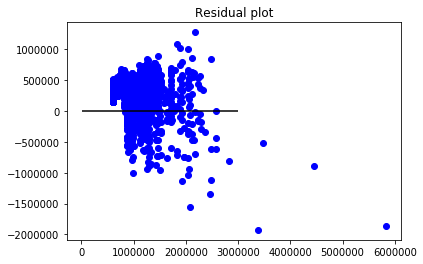

In [232]:
x_plot = plt.scatter(y_pred_test_Ada_Base, (y_pred_test_Ada_Base - test_y_linreg), c='b')

plt.hlines(y=0, xmin= 10000, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

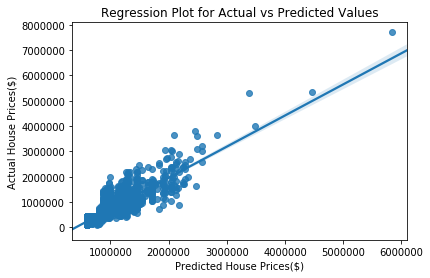

In [233]:
g = sns.regplot(x=y_pred_test_Ada_Base, y=test_y_linreg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

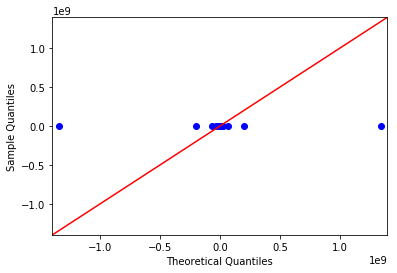

In [234]:
QQPlot(Ada_Base,y_pred_test_Ada_Base,test_y_linreg)

In [235]:
# Look at parameters used by base model
print('Parameters currently in use:\n')
pprint(Ada_Base.get_params())

Parameters currently in use:

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}


##### E.2.2 Hyper Parameter Tuning using RandomizedSearchCV

In [236]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
learning_rate = [0.05, 0.1, 0.5, 1, 2]
loss = ['linear', 'square', 'exponential']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss' : loss
               }
pprint(random_grid)

{'learning_rate': [0.05, 0.1, 0.5, 1, 2],
 'loss': ['linear', 'square', 'exponential'],
 'n_estimators': [10, 57, 105, 152, 200]}


In [237]:
RS_ADA = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = random_grid,cv=3,n_iter = 10,n_jobs=-1)
RS_ADA.fit(train_x_linreg,train_y_linreg)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'learning_rate': [0.05, 0.1, 0.5, 1, 2], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [238]:
RS_ADA.best_params_

{'n_estimators': 152, 'loss': 'exponential', 'learning_rate': 0.05}

In [239]:
best_RS_ADA = RS_ADA.best_estimator_
# Predict
y_pred_test_RS_ADA = best_RS_ADA.predict(test_x_linreg)

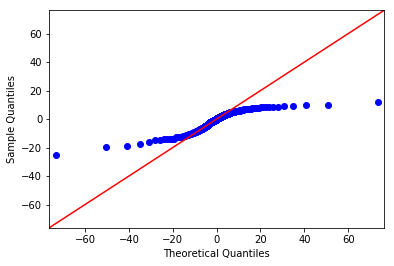

In [240]:
QQPlot(best_RS_ADA,y_pred_test_RS_ADA,test_y_linreg)

In [241]:
best_accuracy_Ada_RS = evaluate_reg(best_RS_ADA, test_x_linreg, test_y_linreg)
accuracy_Ada_RS = best_accuracy_Ada_RS

Model Performance
Average Error: 126800.0158 degrees.
Accuracy = 76.05%.


In [242]:
error_metrics_RS_ADA = cal_rmse_cv(best_RS_ADA,test_y_linreg,y_pred_test_RS_ADA,train_x_linreg,train_y_linreg)

RMSE_RS_ADA = format(error_metrics_RS_ADA['rmse'])
CV_RS_ADA = format(error_metrics_RS_ADA['cv'])
R2_RS_ADA = format(error_metrics_RS_ADA['r2'])

print('Root Mean Squared Error is : {}'.format(error_metrics_RS_ADA['rmse']))
print('Cross Validation Score : {}'.format(error_metrics_RS_ADA['cv']))
print('R2 Score : {}'.format(error_metrics_RS_ADA['r2']))


Root Mean Squared Error is : 198336.88241629346
Cross Validation Score : 205855.27281558694
R2 Score : 0.7033551128377622


Text(0.5,1,'Residual plot')

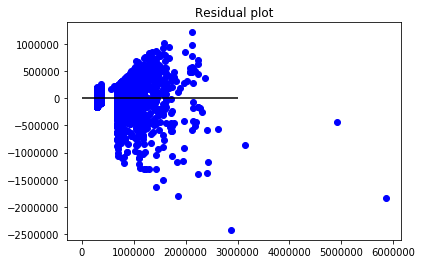

In [243]:

x_plot = plt.scatter(y_pred_test_RS_ADA, (y_pred_test_RS_ADA - test_y_linreg), c='b')

plt.hlines(y=0, xmin= 0, xmax=3000000)

plt.title('Residual plot')

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression Plot for Actual vs Predicted Values')

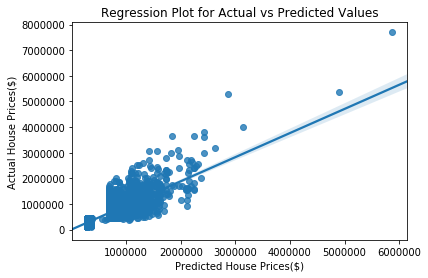

In [244]:

g = sns.regplot(x=y_pred_test_RS_ADA, y=test_y_linreg, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

# Comparision between Models

### Regression Model

In [245]:
header_Reg = ["Section", "Model" , "Tuning Method", "Accuracy" , "RMSE","CV Score", "R2 Score"]
table_Reg  = [
     
                ["C1.1","RandomForest","Base Model",accuracy_RF_Base,RMSE_RF_Base,CV_RF_Base,R2_RF_Base],
                ["C1.2","RandomForest","RandomizedSearch",accuracy_RF_RS,RMSE_RF_RS,CV_RF_RS,R2_RF_RS],
                ["C1.3","RandomForest","GridSearch",accuracy_RF_GS,RMSE_RF_GS,CV_RF_GS,R2_RF_GS],
                
                ["C2.1","XGBoost","Base Model",accuracy_XGB_Base,RMSE_XGB_Base,CV_XGB_Base,R2_XGB_Base],
                ["C2.2","XGBoost","GridSearch",accuracy_XGB_GS,RMSE_XGB_GS,CV_XGB_GS,R2_XGB_GS],
                
                ["D.1","Linear Regression","BaseModel",accuracy_LR,RMSE_LR,CV_LR,R2_LR],
                ["D.2.1","Ridge Regression","Base Model",accuracy_RR_Base,RMSE_RR_Base,CV_RR_Base,R2_RR_Base],
                ["D.2.2","Ridge Regression","GridSearchCV", accuracy_RR_Grid,RMSE_rr_grid,CV_rr_grid,R2_rr_grid],
                
                ["E.2.1","Ada Boosting","Base Model",accuracy_Ada_Base,RMSE_Ada_Base,CV_Ada_Base,R2_Ada_Base],
                ["E.2.2","Ada Boosting","RandomizedSearch",accuracy_Ada_RS,RMSE_RS_ADA,CV_RS_ADA,R2_RS_ADA]
 
            ]
print(tabulate(table_Reg, header_Reg, tablefmt="grid"))

+-----------+-------------------+------------------+------------+--------+------------------+------------+
| Section   | Model             | Tuning Method    |   Accuracy |   RMSE |         CV Score |   R2 Score |
+===========+===================+==================+============+========+==================+============+
| C1.1      | RandomForest      | Base Model       |    86.1487 | 141707 | 139469           |  0.84435   |
+-----------+-------------------+------------------+------------+--------+------------------+------------+
| C1.2      | RandomForest      | RandomizedSearch |    86.7427 | 126664 | 136264           |  0.875643  |
+-----------+-------------------+------------------+------------+--------+------------------+------------+
| C1.3      | RandomForest      | GridSearch       |    86.7427 | 160305 | 164498           |  0.800813  |
+-----------+-------------------+------------------+------------+--------+------------------+------------+
| C2.1      | XGBoost           | Bas

- By comparing among the Random Forest, we found that RandomizedSearchCV tuned model perforemed better than others.
- By comparing among the XGBoost models, GridSearch tuned model perforemed well.
- By comparing among the AdaBoosting models, RandomizedSearchCV tuned model perforemed better.
- By comparing all the Linear Regression models, Linear Regression Base Model perforemed better.

- By comparing between one boosting and one bagging model, boosting model(XGBoost GridSearch) perforemed the best.
- By comparing Linear Regression with Boosting and Bagging, AdaBoost(Base Model) perforemed worse.

### Classification Model

In [247]:
header_Cl = ["Section", "Model" , "Tuning Method", "Accuracy" , "R2 Score","F1 Score", "AUC Score"]
table_cl  = [
                    
       
        ["A1.1","RandomForest","Base Model",Accuracy_LG_RF_Base,R2_LG_RF_Base,F1_LG_RF_Base,AUC_LG_RF_Base],
        ["A1.2","RandomForest","RandomizedSearch",Accuracy_LG_RF_RS,R2_LG_RF_RS,F1_LG_RF_RS,AUC_LG_RF_RS],
        ["A1.3","RandomForest","GridSearch",Accuracy_LG_RF_GS,R2_LG_RF_GS,F1_LG_RF_GS,AUC_LG_RF_GS],
        
        ["A2.1","XGBoost","Base Model",Accuracy_LG_XGB_Base,R2_LG_XGB_Base,F1_LG_XGB_Base,AUC_LG_XGB_Base],
        ["A2.2","XGBoost","GridSearch",Accuracy_LG_XGB_GS,R2_LG_XGB_GS,F1_LG_XGB_GS,AUC_LG_XGB_GS],
        
        ["B.1","Logistic Regression","BaseModel",Accuracy_LG_LR_Base,R2_LG_LR_Base,F1_LG_LR_Base,AUC_LG_LR_Base],
        
        ["E.1.1","Ada Boosting","Base Model",Accuracy_LG_ADA_Base,R2_LG_ADA_Base,F1_LG_ADA_Base,AUC_LG_ADA_Base],
        ["E.1.2","Ada Boosting","GridSearch",Accuracy_LG_ADA_GS,R2_LG_ADA_GS,F1_LG_ADA_GS,AUC_LG_ADA_GS]
 
            ]
print(tabulate(table_cl, header_Cl, tablefmt="grid"))

+-----------+---------------------+------------------+------------+------------+------------+-------------+
| Section   | Model               | Tuning Method    |   Accuracy |   R2 Score |   F1 Score |   AUC Score |
+===========+=====================+==================+============+============+============+=============+
| A1.1      | RandomForest        | Base Model       |   0.903917 |   0.615625 |   0.902884 |    0.903908 |
+-----------+---------------------+------------------+------------+------------+------------+-------------+
| A1.2      | RandomForest        | RandomizedSearch |   0.90145  |   0.605753 |   0.900545 |    0.901457 |
+-----------+---------------------+------------------+------------+------------+------------+-------------+
| A1.3      | RandomForest        | GridSearch       |   0.902221 |   0.608838 |   0.9014   |    0.902236 |
+-----------+---------------------+------------------+------------+------------+------------+-------------+
| A2.1      | XGBoost       

- By comparing among the Random Forest, we found that Base model perforemed better than others.
- By comparing among the XGBoost models, GridSearch tuned model perforemed well.
- By comparing among the AdaBoosting  models, GridSearch tuned model perforemed better.

- By comparing between one boosting and one bagging model, boosting model(XGBoost GridSearch) perforemed the best.
- Logistic Regression performed the worst among all.


# Conclusion

From the above model comparison, I got to know that both Regressor and Classification models have some pros and cons. By comparing the algorithms from both I found that XGBoost GridSearch with tuned hyper parameter performed well.

# Contributions statement

Classification Model:
- To know more about the model performance I have used different scores(i.e. R2 score, f1 score, AUC) in cookie cutter
- Also used confusion matrix, classification_report
- Added a cookie cutter that evaluate parameter to show hyperparameter performance graphically for Random Forest Classifier
Regression Model:
- Added histogram plot and QQ plot to check the normality distribution
- To know more about the model performance I have used different scores(i.e. RMSE, R2 score, f1 score) in cookie cutter
- Added Residual plot and regression plot
- Code added for linear Regression and Ridge Rigression

I have used AdaBoost Algorithm(Classification & Regression) as a part of extra Supervised learning Algorithm

Also added grid table to compare all models' performance through parameters.

### So I believe around 50% of the code written by me.


# Citations

- https://www.kaggle.com/grfiv4/plotting-feature-importances
- http://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
- https://github.com/NikhilaThota/CapstoneProject_House_Prices_Prediction/blob/master/Regression_Analysis.ipynb
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b  
- https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e    

# License

MIT License

Copyright (c) 2019 Pratyusha Kar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.